# Principal Component Analysis

1. Reduce number of attributes
2. When want to check if variables are independent of each other.
3. Ready to make independent features less iterpretable

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn import datasets

In [4]:
iris = datasets.load_iris()
X = iris.data
X_std = StandardScaler().fit_transform(X)

In [7]:
conv_matrix = np.cov(X_std.T)
print("Coverence Metrix",conv_matrix)

Coverence Metrix [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


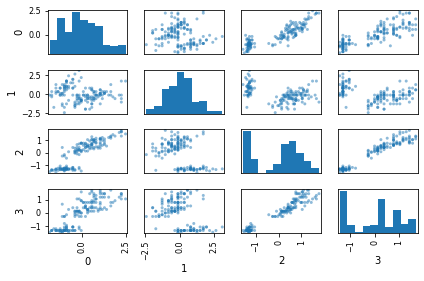

In [8]:
df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(df)
plt.tight_layout()

In [9]:
eig_vals,eig_vecs = np.linalg.eig(conv_matrix)

In [10]:
print("Eigen Vectors",eig_vecs)
print("Eigen Values",eig_vals)

Eigen Vectors [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
Eigen Values [2.93808505 0.9201649  0.14774182 0.02085386]


In [11]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ i, :]) for i in range(len(eig_vals))]
print(eigen_pairs)

[(2.938085050199995, array([ 0.52106591, -0.37741762, -0.71956635,  0.26128628])), (0.9201649041624864, array([-0.26934744, -0.92329566,  0.24438178, -0.12350962])), (0.1477418210449475, array([ 0.5804131 , -0.02449161,  0.14212637, -0.80144925])), (0.020853862176462696, array([ 0.56485654, -0.06694199,  0.63427274,  0.52359713]))]


In [12]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 72.96244541  95.8132072   99.48212909 100.        ]


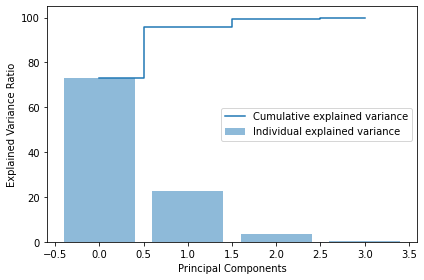

In [13]:

plt.figure(figsize=(6 , 4))
plt.bar(range(4), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(4), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()